## Online gaming platform data analysis

ABC is a real-money online gaming company providing multiplayer games such as Ludo. An user can register as a player, 
deposit money in the platform and play games with other players on the platform. 

If he/she wins the game then they can withdraw the winning amount while the platform charges a nominal fee for the services.
 
To retain players on the platform, the company ABC gives loyalty points to their players based on their activity on the platform.
 
Loyalty points are calculated on the basis of the number of games played, deposits and withdrawal made on the platform by a particular player.

Deposit of money on the platform	0.01	0.01 * Deposit Amount	0.01 * (1000 RS Deposit) = 10 Points

Withdrawal of money from the platform	0.005	0.005 * Withdrawal Amount	0.005 * (500 Rs Withdrawal) = 2.5 Points

How many more times did a player do deposit than withdrawal	0.001	0.001 * maximum of (#deposit - #windrawal) or 0	"0.001 * max((5-3, 0))
= 0.001 * 2
= 0.002 points

where number of deposit = 5
and number of withdrawal = 3"							
Number of games played	0.2	0.2 *Number of Games Played	0.2 * (50 Total Games Played) = 10 Points							
										
"Final Loyalty Point Formula
Loyalty Point = (0.01 * deposit) + (0.005 * Withdrawal amount) + (0.001 * (maximum of (#deposit - #withdrawal) or 0)) + (0.2 * Number of games played)

At the end of each month total loyalty points are alloted to all the players. Out of which the top 50 players are provided cash benefits."

### Importing libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset and exploring

In [7]:
gm = pd.read_csv('C:/Users/anand/data projects/gameplay.csv')

In [8]:
gm

,User_ID,Games_Played,time,Date
0,851,1,00:00:00,01-10-2022
1,717,1,00:00:00,01-10-2022
2,456,1,00:00:00,01-10-2022
3,424,1,00:00:00,01-10-2022
4,845,1,00:00:00,01-10-2022
...,...,...,...,...
355261,658,1,23:59:00,31-10-2022
355262,582,1,23:59:00,31-10-2022
355263,272,1,23:59:00,31-10-2022
355264,563,1,23:59:00,31-10-2022


In [9]:
gm = gm.rename(columns={'User_ID': 'User_Id'})

In [10]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355266 entries, 0 to 355265
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   User_Id       355266 non-null  int64 
 1   Games_Played  355266 non-null  int64 
 2   time          355266 non-null  object
 3   Date          355266 non-null  object
dtypes: int64(2), object(2)
memory usage: 10.8+ MB


In [11]:
gm.isna().sum()

User_Id         0
Games_Played    0
time            0
Date            0
dtype: int64

In [12]:
gm.shape

(355266, 4)

In [13]:
gm.nunique()

User_Id         1000
Games_Played       2
time            1440
Date              31
dtype: int64

In [14]:
gm.dtypes

User_Id          int64
Games_Played     int64
time            object
Date            object
dtype: object

In [15]:
dp = pd.read_csv('C:/Users/anand/data projects/deposit_data.csv')

In [16]:
dp

,User_Id,Amount,Date,Time
0,357,2000,01-10-2022,00:03:00
1,776,2500,01-10-2022,00:03:00
2,492,5000,01-10-2022,00:06:00
3,803,5000,01-10-2022,00:07:00
4,875,1500,01-10-2022,00:09:00
...,...,...,...,...
17433,654,1200,31-10-2022,23:57:00
17434,980,200,31-10-2022,23:58:00
17435,2,40000,31-10-2022,23:58:00
17436,612,2800,31-10-2022,23:58:00


In [17]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17438 entries, 0 to 17437
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User_Id  17438 non-null  int64 
 1   Amount   17438 non-null  int64 
 2   Date     17438 non-null  object
 3   Time     17438 non-null  object
dtypes: int64(2), object(2)
memory usage: 545.1+ KB


In [18]:
dp.isna().sum()

User_Id    0
Amount     0
Date       0
Time       0
dtype: int64

In [19]:
dp[dp.duplicated()]

,User_Id,Amount,Date,Time
10863,933,501,20-10-2022,00:09:00


In [20]:
dp = dp.drop_duplicates()

In [21]:
dp.shape

(17437, 4)

In [22]:
dp.nunique()

User_Id     915
Amount      743
Date         31
Time       1440
dtype: int64

In [23]:
dp.dtypes

User_Id     int64
Amount      int64
Date       object
Time       object
dtype: object

In [24]:
wd = pd.read_csv('C:/Users/anand/data projects/withdrawal.csv')

In [25]:
wd.head()

,User_Id,Amount,Date,time
0,190,5872,01-10-2022,00:03:00
1,159,9540,01-10-2022,00:16:00
2,164,815,01-10-2022,00:24:00
3,946,23000,01-10-2022,00:29:00
4,763,9473,01-10-2022,00:40:00


In [26]:
wd.tail()

,User_Id,Amount,Date,time
3561,559,5000,31-10-2022,23:27:00
3562,407,3000,31-10-2022,23:51:00
3563,389,14481,31-10-2022,23:56:00
3564,11,4000,31-10-2022,23:57:00
3565,112,1604,31-10-2022,23:58:00


In [27]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User_Id  3566 non-null   int64 
 1   Amount   3566 non-null   int64 
 2   Date     3566 non-null   object
 3   time     3566 non-null   object
dtypes: int64(2), object(2)
memory usage: 111.6+ KB


In [28]:
wd.shape

(3566, 4)

In [29]:
wd.dtypes

User_Id     int64
Amount      int64
Date       object
time       object
dtype: object

In [30]:
wd.isna().sum()

User_Id    0
Amount     0
Date       0
time       0
dtype: int64

In [31]:
wd[wd.duplicated()]

,User_Id,Amount,Date,time


In [32]:
wd.nunique()

User_Id     514
Amount     1351
Date         31
time       1324
dtype: int64

### Part-A Calculating loyalty points

On each day, there are 2 slots for each of which the loyalty points are to be calculated:
S1 from 12am to 12pm 
S2 from 12pm to 12am"

In [34]:
dp['Date'] = pd.to_datetime(dp['Date'],format='%d-%m-%Y')
dp['Time'] = pd.to_datetime(dp['Time'], format='%H:%M:%S').dt.time

dp['Datetime'] = pd.to_datetime(dp['Date'].astype(str) + ' ' + dp['Time'].astype(str))

dp['slot'] = dp['Datetime'].dt.hour.apply(lambda x: 'S1' if x < 12 else 'S2')

dp['Date'] = dp['Datetime'].dt.date

deposit_summary = dp.groupby(['User_Id', 'slot', 'Date']).agg(
    total_deposit=('Amount', 'sum'),
    deposit_count=('Amount', 'size')
).reset_index()

DP = pd.merge(dp, deposit_summary, on=['User_Id', 'slot', 'Date'], how='left')
DP = DP.drop(columns=['Date', 'Time'])

In [35]:
DP.head()

,User_Id,Amount,Datetime,slot,total_deposit,deposit_count
0,357,2000,2022-10-01 00:03:00,S1,2000,1
1,776,2500,2022-10-01 00:03:00,S1,8500,2
2,492,5000,2022-10-01 00:06:00,S1,5000,1
3,803,5000,2022-10-01 00:07:00,S1,5000,1
4,875,1500,2022-10-01 00:09:00,S1,1500,1


In [36]:
gm['Date'] = pd.to_datetime(gm['Date'], format='%d-%m-%Y')
gm['time'] = pd.to_datetime(gm['time'], format='%H:%M:%S').dt.time

gm['Datetime'] = pd.to_datetime(gm['Date'].astype(str) + ' ' + gm['time'].astype(str))

gm['slot'] = gm['Datetime'].dt.hour.apply(lambda x: 'S1' if x < 12 else 'S2')

gm['Date'] = gm['Datetime'].dt.date

total_game_played = gm.groupby(['User_Id', 'slot', 'Date']).agg(
    total_game_played=('Games_Played', 'sum')
).reset_index()

GM = pd.merge(gm, total_game_played, on=['User_Id', 'slot', 'Date'], how='left')
GM = GM.drop(columns=['Date', 'time'])

In [37]:
GM.head()

,User_Id,Games_Played,Datetime,slot,total_game_played
0,851,1,2022-10-01,S1,17
1,717,1,2022-10-01,S1,7
2,456,1,2022-10-01,S1,85
3,424,1,2022-10-01,S1,8
4,845,1,2022-10-01,S1,22


In [38]:
wd['Date'] = pd.to_datetime(wd['Date'], format='%d-%m-%Y')
wd['time'] = pd.to_datetime(wd['time'], format='%H:%M:%S').dt.time

wd['Datetime'] = pd.to_datetime(wd['Date'].astype(str) + ' ' + wd['time'].astype(str))

wd['slot'] = wd['Datetime'].dt.hour.apply(lambda x: 'S1' if x < 12 else 'S2')

wd['Date'] = wd['Datetime'].dt.date

withdrawl_summary = wd.groupby(['User_Id', 'slot', 'Date']).agg(
    total_withdrawlt=('Amount', 'sum'),
    withdrawl_count=('Amount', 'size')
).reset_index()

WD = pd.merge(wd, withdrawl_summary, on=['User_Id', 'slot', 'Date'], how='left')
WD = WD.drop(columns=['Date', 'time'])

In [39]:
WD.head()

,User_Id,Amount,Datetime,slot,total_withdrawlt,withdrawl_count
0,190,5872,2022-10-01 00:03:00,S1,5872,1
1,159,9540,2022-10-01 00:16:00,S1,9540,1
2,164,815,2022-10-01 00:24:00,S1,6015,2
3,946,23000,2022-10-01 00:29:00,S1,97000,3
4,763,9473,2022-10-01 00:40:00,S1,9473,1


### Calculating loyalty points

In [41]:
merged_data = pd.merge(DP, WD, 
                       on=['User_Id', 'Datetime', 'slot'], how='left')

merged_data = pd.merge(merged_data, GM, 
                       on=['User_Id', 'Datetime', 'slot'], how='left')

# Calculate loyalty points based on the given formula
merged_data['loyalty_points'] = (
    0.01 * merged_data['total_deposit'].fillna(0) +
    0.005 * merged_data['total_withdrawlt'].fillna(0) +
    0.001 * (merged_data['deposit_count'].fillna(0) - merged_data['total_withdrawlt'].fillna(0)).clip(lower=0) +
    0.2 * merged_data['total_game_played'].fillna(0)
)
loyalty_points = merged_data[['User_Id', 'Datetime', 'slot', 'loyalty_points']]


In [42]:
loyalty_points

,User_Id,Datetime,slot,loyalty_points
0,357,2022-10-01 00:03:00,S1,20.001
1,776,2022-10-01 00:03:00,S1,85.002
2,492,2022-10-01 00:06:00,S1,50.001
3,803,2022-10-01 00:07:00,S1,50.001
4,875,2022-10-01 00:09:00,S1,15.001
...,...,...,...,...
17440,654,2022-10-31 23:57:00,S2,33.002
17441,980,2022-10-31 23:58:00,S2,57.003
17442,2,2022-10-31 23:58:00,S2,800.002
17443,612,2022-10-31 23:58:00,S2,28.001


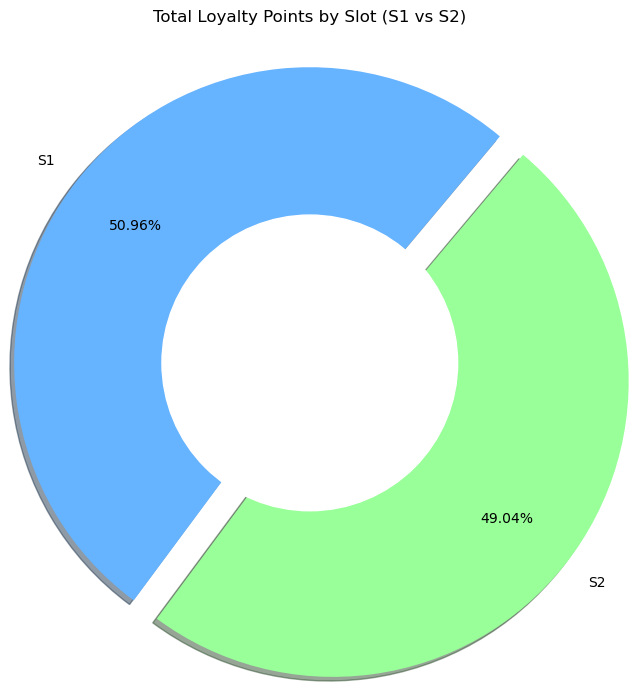

In [43]:
def plot_donut_chart(data: pd.DataFrame):
    slot_loyalty_points = data.groupby('slot')['loyalty_points'].sum()
    plt.pie(
        slot_loyalty_points,
        labels=['S1', 'S2'],
        colors=['#66b3ff', '#99ff99'],
        startangle=50,
        shadow=True,
        radius=2,
        explode=(0, 0.2),
        autopct='%1.2f%%',
        pctdistance=0.75
    )
    circle = plt.Circle((0, 0), 1, color='white')
    plt.gca().add_artist(circle)
    plt.title("Total Loyalty Points by Slot (S1 vs S2)", y = 1.4)
    plt.show()

plot_donut_chart(loyalty_points)

### 1. Playerwise Loyalty points earned by Players in the following slots:-
a. 2nd October Slot S1
    

In [45]:
LP = pd.DataFrame(loyalty_points)

_2nd_October_Slot_S1 = LP[(LP['Datetime'].dt.date == pd.to_datetime('2022-10-02').date()) & (LP['slot'] == 'S1')]

_2nd_October_Slot_S1 = _2nd_October_Slot_S1[['User_Id', 'Datetime', 'slot', 'loyalty_points']]

grouped_2nd_October_Slot_S1 = _2nd_October_Slot_S1.groupby(['User_Id', 'slot'])['loyalty_points'].sum().reset_index()

sorted_2nd_October_Slot_S1 = grouped_2nd_October_Slot_S1.sort_values(by='loyalty_points', ascending=False)

sorted_2nd_October_Slot_S1.head(5)

,User_Id,slot,loyalty_points
42,173,S1,2084.016
156,740,S1,1275.009
91,446,S1,1100.004
135,672,S1,1000.001
46,193,S1,880.016


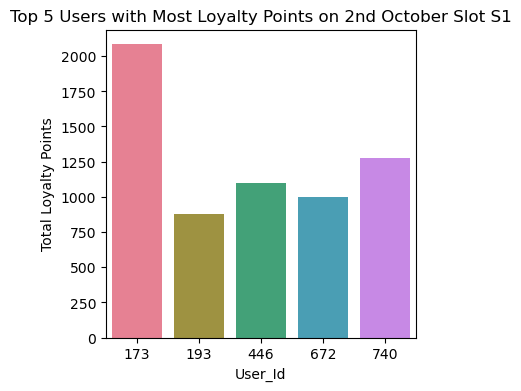

In [46]:
def _2nd_October_Slot_S1(data: pd.DataFrame, palette='husl'):
    user_loyalty_points = data.groupby('User_Id')['loyalty_points'].sum()
    top_5_users = user_loyalty_points.nlargest(5)
    top_5_data = data[data['User_Id'].isin(top_5_users.index)]
    plt.figure(figsize=(4, 4))
    sns.barplot(x='User_Id', y='loyalty_points', data=top_5_data, palette=palette, estimator=sum)
    plt.title('Top 5 Users with Most Loyalty Points on 2nd October Slot S1', y=1)
    plt.xlabel('User_Id')
    plt.ylabel('Total Loyalty Points')
    plt.show()
_2nd_October_Slot_S1(sorted_2nd_October_Slot_S1)

b. 16th October Slot S2

In [48]:
_16th_October_Slot_S2 = LP[(LP['Datetime'].dt.date == pd.to_datetime('2022-10-16').date()) & (LP['slot'] == 'S2')]

_16th_October_Slot_S2 = _16th_October_Slot_S2[['User_Id', 'Datetime', 'slot', 'loyalty_points']]

grouped_16th_October_Slot_S2 = _16th_October_Slot_S2.groupby(['User_Id', 'slot'])['loyalty_points'].sum().reset_index()

sorted_16th_October_Slot_S2 = grouped_16th_October_Slot_S2.sort_values(by='loyalty_points', ascending=False)

sorted_16th_October_Slot_S2.head(5)

,User_Id,slot,loyalty_points
6,28,S2,3600.016
106,566,S2,2640.009
16,99,S2,1960.004
32,212,S2,999.991
84,455,S2,800.004


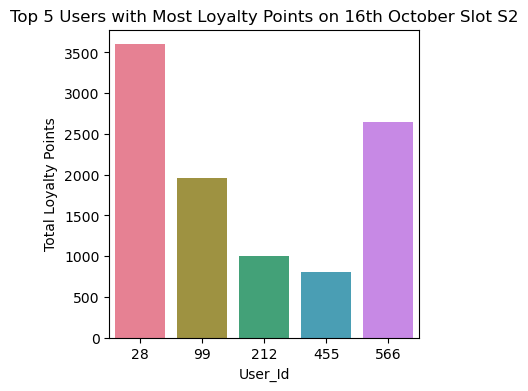

In [49]:
def _16th_October_Slot_S2(data: pd.DataFrame, palette='husl'):
    user_loyalty_points = data.groupby('User_Id')['loyalty_points'].sum()
    top_5_users = user_loyalty_points.nlargest(5)
    top_5_data = data[data['User_Id'].isin(top_5_users.index)]
    plt.figure(figsize=(4, 4))
    sns.barplot(x='User_Id', y='loyalty_points', data=top_5_data, palette=palette, estimator=sum)
    plt.title('Top 5 Users with Most Loyalty Points on 16th October Slot S2', y=1)
    plt.xlabel('User_Id')
    plt.ylabel('Total Loyalty Points')
    plt.show()
_16th_October_Slot_S2(sorted_16th_October_Slot_S2)

c. 18th October Slot S1

In [51]:
_18th_October_Slot_S1 = LP[(LP['Datetime'].dt.date == pd.to_datetime('2022-10-18').date()) & (LP['slot'] == 'S1')]

_18th_October_Slot_S1 = _18th_October_Slot_S1[['User_Id', 'Datetime', 'slot', 'loyalty_points']]

grouped_18th_October_Slot_S1 = _18th_October_Slot_S1.groupby(['User_Id', 'slot'])['loyalty_points'].sum().reset_index()

sorted_18th_October_Slot_S1 = grouped_18th_October_Slot_S1.sort_values(by='loyalty_points', ascending=False)

sorted_18th_October_Slot_S1.head(5)

,User_Id,slot,loyalty_points
61,352,S1,2513.775
35,208,S1,1700.001
183,950,S1,1520.016
45,259,S1,1500.016
102,547,S1,1215.009


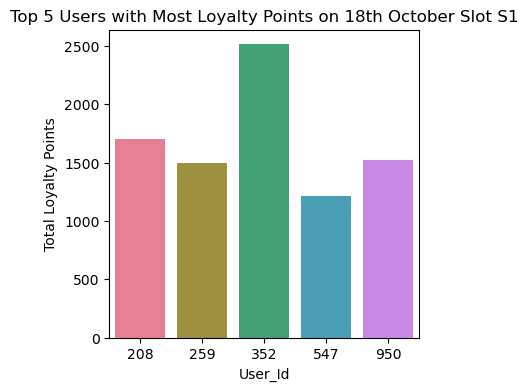

In [52]:
def _18th_October_Slot_S1(data: pd.DataFrame, palette='husl'):
    user_loyalty_points = data.groupby('User_Id')['loyalty_points'].sum()
    top_5_users = user_loyalty_points.nlargest(5)
    top_5_data = data[data['User_Id'].isin(top_5_users.index)]
    plt.figure(figsize=(4, 4))
    sns.barplot(x='User_Id', y='loyalty_points', data=top_5_data, palette=palette, estimator=sum)
    plt.title('Top 5 Users with Most Loyalty Points on 18th October Slot S1', y=1)
    plt.xlabel('User_Id')
    plt.ylabel('Total Loyalty Points')
    plt.show()
_18th_October_Slot_S1(sorted_18th_October_Slot_S1)

d. 26th October Slot S2

In [54]:
_26th_October_Slot_S2 = LP[(LP['Datetime'].dt.date == pd.to_datetime('2022-10-26').date()) & (LP['slot'] == 'S2')]

_26th_October_Slot_S2 = _26th_October_Slot_S2[['User_Id', 'Datetime', 'slot', 'loyalty_points']]

grouped_26th_October_Slot_S2 = _26th_October_Slot_S2.groupby(['User_Id', 'slot'])['loyalty_points'].sum().reset_index()

sorted_26th_October_Slot_S2= grouped_26th_October_Slot_S2.sort_values(by='loyalty_points', ascending=False)

sorted_26th_October_Slot_S2.head(5)

,User_Id,slot,loyalty_points
105,538,S2,3600.009
140,714,S2,2000.001
0,2,S2,1800.004
171,909,S2,1680.016
45,238,S2,1644.009


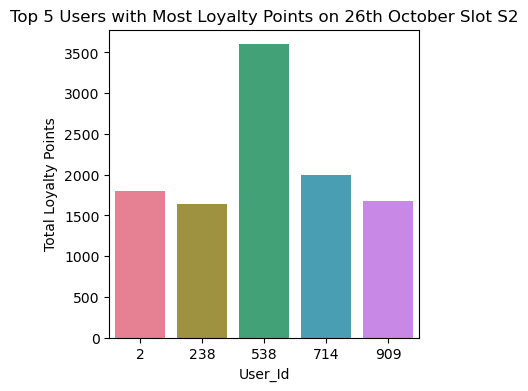

In [55]:
def _26th_October_Slot_S2(data: pd.DataFrame, palette='husl'):
    user_loyalty_points = data.groupby('User_Id')['loyalty_points'].sum()
    top_5_users = user_loyalty_points.nlargest(5)
    top_5_data = data[data['User_Id'].isin(top_5_users.index)]
    plt.figure(figsize=(4, 4))
    sns.barplot(x='User_Id', y='loyalty_points', data=top_5_data, palette=palette, estimator=sum)
    plt.title('Top 5 Users with Most Loyalty Points on 26th October Slot S2', y=1)
    plt.xlabel('User_Id')
    plt.ylabel('Total Loyalty Points')
    plt.show()
_26th_October_Slot_S2(sorted_26th_October_Slot_S2)

### 2. Calculating overall loyalty points earned and ranking players on the basis of loyalty points in the month of October. 
In case of tie, number of games played should be taken as the next criteria for ranking.

In [57]:
player_stats = LP.groupby('User_Id').agg(
    total_loyalty_points=('loyalty_points', 'sum'),
    games_played=('User_Id', 'size')
).reset_index()

player_stats_sorted = player_stats.sort_values(
    by=['total_loyalty_points', 'games_played'],
    ascending=[False, False] 
).reset_index(drop=True)

player_stats_sorted['rank'] = player_stats_sorted.index + 1

player_stats_sorted[['User_Id', 'total_loyalty_points', 'games_played', 'rank']]

,User_Id,total_loyalty_points,games_played,rank
0,740,41405.517,91,1
1,352,34328.380,128,2
2,566,33291.851,53,3
3,672,29358.051,35,4
4,30,25110.093,51,5
...,...,...,...,...
910,172,4.004,4,911
911,98,3.001,1,912
912,188,3.001,1,913
913,912,2.505,5,914


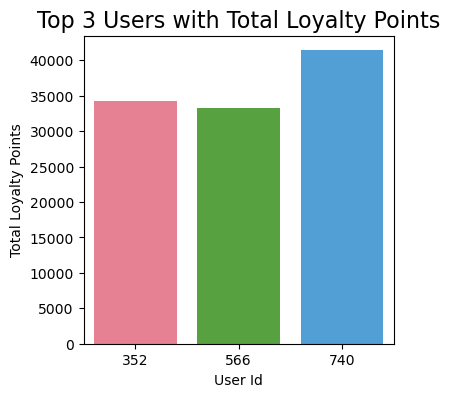

In [58]:
def _loyalty_points(data: pd.DataFrame, palette='husl'):
    _top_3_users = player_stats_sorted.sort_values(by='rank').head(3)
    plt.figure(figsize=(4, 4))
    sns.barplot(x='User_Id', y='total_loyalty_points', data=_top_3_users, palette=palette)
    plt.title('Top 3 Users with Total Loyalty Points', fontsize=16)
    plt.xlabel('User Id')
    plt.ylabel('Total Loyalty Points')
    plt.show()
_loyalty_points(player_stats_sorted)

### 3. What is the average deposit amount?

In [60]:
DP.head(5)

,User_Id,Amount,Datetime,slot,total_deposit,deposit_count
0,357,2000,2022-10-01 00:03:00,S1,2000,1
1,776,2500,2022-10-01 00:03:00,S1,8500,2
2,492,5000,2022-10-01 00:06:00,S1,5000,1
3,803,5000,2022-10-01 00:07:00,S1,5000,1
4,875,1500,2022-10-01 00:09:00,S1,1500,1


In [61]:
average_deposit_amount = DP['Amount'].mean()
average_deposit_amount


5492.4716407638925

### 4. What is the average deposit amount per user in a month?

In [63]:
user_deposits = DP.groupby('User_Id').agg(
    total_deposit=('Amount', 'sum'),
    days_active=('Datetime', 'nunique')
).reset_index()

user_deposits['avg_deposit_per_user'] = user_deposits['total_deposit'] / user_deposits['days_active']

user_deposits['avg_deposit_per_user'] = user_deposits['avg_deposit_per_user'].round(2)

user_deposits[['User_Id', 'total_deposit', 'days_active', 'avg_deposit_per_user']]

,User_Id,total_deposit,days_active,avg_deposit_per_user
0,1,5000,1,5000.00
1,2,567000,20,28350.00
2,3,40000,4,10000.00
3,4,1750,1,1750.00
4,5,74100,67,1105.97
...,...,...,...,...
910,994,1400,1,1400.00
911,995,34500,5,6900.00
912,996,96400,31,3109.68
913,998,7400,5,1480.00


### 5. What is the average number of games played per user?

In [65]:
GM.head(5)

,User_Id,Games_Played,Datetime,slot,total_game_played
0,851,1,2022-10-01,S1,17
1,717,1,2022-10-01,S1,7
2,456,1,2022-10-01,S1,85
3,424,1,2022-10-01,S1,8
4,845,1,2022-10-01,S1,22


In [66]:
average_games_per_user = GM['Games_Played'].mean()
average_games_per_user

1.0000028147922966

## Part B - How much bonus should be allocated to leaderboard players?

After calculating the loyalty points for the whole month find out which 50 players are at the top of the leaderboard. The company has allocated a pool of Rs 50000 to be given away as bonus money to the loyal players.

Now the company needs to determine how much bonus money should be given to the players.

Should they base it on the amount of loyalty points? Should it be based on number of games? Or something else?

In [68]:
PS = pd.DataFrame(player_stats_sorted[['User_Id', 'total_loyalty_points', 'games_played', 'rank']])
PS.head(5)

,User_Id,total_loyalty_points,games_played,rank
0,740,41405.517,91,1
1,352,34328.380,128,2
2,566,33291.851,53,3
3,672,29358.051,35,4
4,30,25110.093,51,5


Suggested Bonus Allocation Formula:
Calculate a Weighted Score for Each Player: Combine both loyalty points and the number of games played into a single metric, so we can rank the players more fairly:


Weighted Score=α×Loyalty Points+β×Games Played
Where:

α and β are weights that control the relative importance of loyalty points versus the number of games played. We can choose values like α=0.7 and β=0.3 to prioritize loyalty points more heavily but still acknowledge frequent play.
Rank the Players by Weighted Score: After calculating the weighted score, rank the players from highest to lowest.

Allocate the Bonus Based on Rank: Distribute the Rs 50,000 pool across the top 50 players based on their rank. One way to do this is to use a proportional distribution:

Bonus for Weighted Score for Player i / Player i= 
Total Weighted Score of To ×50,000p i
​
 ×50,000
This way, players with higher scores (more loyalty points and/or more games played) will receive a larger share of the bonus pool.

In [70]:
A = 0.7
B = 0.3

PS['weighted_score'] = A * PS['total_loyalty_points'] + B * PS['games_played']

top_players = PS[PS['rank'] <= 50]

total_weighted_score = top_players['weighted_score'].sum()

top_players['bonus'] = (top_players['weighted_score'] / total_weighted_score) * 50000

top_players['bonus'] = top_players['bonus'].round(2)

top_players[['User_Id', 'total_loyalty_points', 'games_played', 'weighted_score', 'rank', 'bonus']].head(3)

,User_Id,total_loyalty_points,games_played,weighted_score,rank,bonus
0,740,41405.517,91,29011.1619,1,2756.96
1,352,34328.380,128,24068.2660,2,2287.23
2,566,33291.851,53,23320.1957,3,2216.14


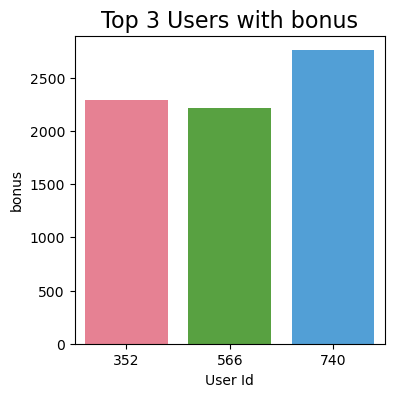

In [71]:
def _bonus(data: pd.DataFrame, palette='husl'):
    _top_3_bonus = top_players.sort_values(by='rank').head(3)
    plt.figure(figsize=(4, 4))
    sns.barplot(x='User_Id', y='bonus', data=_top_3_bonus, palette=palette)
    plt.title('Top 3 Users with bonus', fontsize=16)
    plt.xlabel('User Id')
    plt.ylabel('bonus')
    plt.show()
_bonus(top_players)

## Thank you

# By Rishav Anand